Exploring tutorial: <br>
Looking for another regression "better" than OLS <br>
Will be exploring Lasso regression in this assignment to determine if it works better in predicting missing data than using OLS <br>

Recap on previous assignment discussion <br>
<font color='blue'>
From the figures above where predicted and actual values were plotted: <br>
1) S11-DRP - worked well <br>
2) S11-TP - worked okay (within somewhat expected range, but the model had weak R2 and p-value) <br>
3) S11-TSS - worked okay (within somewhat expected range) <br>
4) S12- DRP - worked well <br>
5) S12 - TP - worked well <br>
6) S12 - TSS - did not work at all (some of the predicted TSS concentrations were negative) <br>

In summary, this OLS model worked well for DRP and TP, but not TSS. Another suitable model is needed to predict TSS concentration. A potential approach is to multiple-linear-regression to incorporate several parameters such as precipitation data (antecedent condition) and time of the year (seasonality - land cover density).
</font>

So...in this assignment we will be exploring Lasso regression to determine if it works better in predicting missing data (especially TSS) than using OLS <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [2]:
# import data from excel
data = pd.read_excel('JY_linear_reg_data.xlsx', sheet_name = 'Data')

# drop 'VSS' column, rename the columns into shorter names
data = data.drop(columns=['VSS (mg/L)'])
data = data.rename(columns={'Sample date': 'Date', 'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP', 'TP (mg P/L)':'TP', 'TSS (mg/L)':'TSS'})
data.head()

,Date,Site,Flow,DRP,TP,TSS
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000


In [3]:
# separate data by site
data_11 = data[data['Site'] == 'S11']
data_12 = data[data['Site'] == 'S12']

# check the number of null values
print('S11')
print(data_11.isnull().sum())
print('S12')
print(data_12.isnull().sum())

S11
Date    0
Site    0
Flow    0
DRP     3
TP      3
TSS     3
dtype: int64
S12
Date    0
Site    0
Flow    0
DRP     4
TP      4
TSS     4
dtype: int64


In [4]:
# create separate dataframe that only contain null values
data_11_null = data_11[data_11.isnull().any(axis=1)]
data_12_null = data_12[data_12.isnull().any(axis=1)]
print('S11')
print(data_11_null)
print('S12')
print(data_12_null)

S11
         Date Site      Flow  DRP  TP  TSS
21 2018-06-22  S11  0.103414  NaN NaN  NaN
22 2018-06-27  S11  0.189099  NaN NaN  NaN
28 2018-10-11  S11  0.156634  NaN NaN  NaN
S12
         Date Site      Flow  DRP  TP  TSS
59 2018-08-21  S12  0.128687  NaN NaN  NaN
60 2018-08-31  S12  0.028923  NaN NaN  NaN
61 2018-09-06  S12  0.024730  NaN NaN  NaN
62 2018-09-26  S12  0.022594  NaN NaN  NaN


In [5]:
# drop the null values from the original dataset
data_11 = data_11.dropna()
data_12 = data_12.dropna()
print('S11')
print(data_11.isnull().sum())
print('S12')
print(data_12.isnull().sum())

S11
Date    0
Site    0
Flow    0
DRP     0
TP      0
TSS     0
dtype: int64
S12
Date    0
Site    0
Flow    0
DRP     0
TP      0
TSS     0
dtype: int64


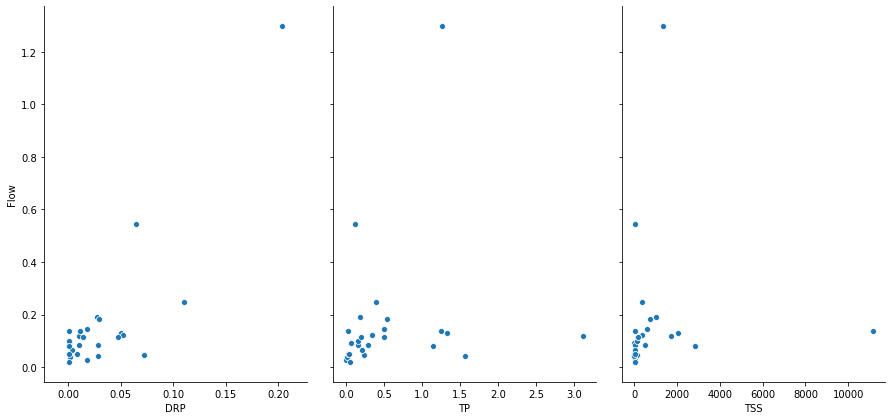

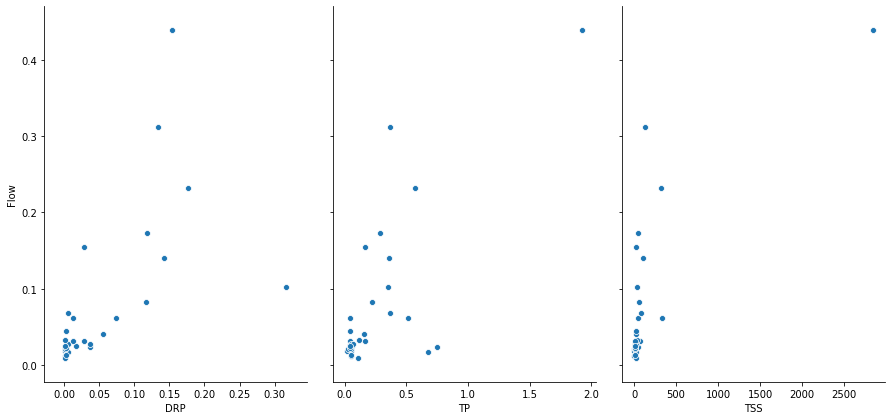

In [6]:
# visualize the relationship between flow and responses
sns.pairplot(data_11, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)
sns.pairplot(data_12, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)
plt.show()

In [7]:
# there are 6 datasets, try to use 1 dataset to get the model to work first, then incorporate the loop function later
import numpy as np

x = np.log(data_12['Flow'])
X = x[:, np.newaxis]
print(X.shape)

Y = data_12['DRP'] 
print(Y.shape)

(32, 1)
(32,)


In [8]:
# split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train.shape

(24, 1)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# small alpha value is needed 
reg = linear_model.Lasso(alpha=0.001)

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)

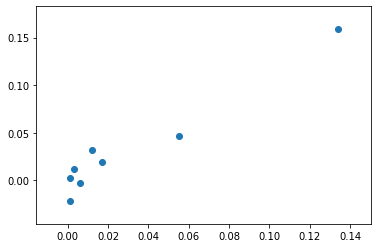

R2 = 0.8831457973147876


In [11]:
from sklearn.metrics import r2_score

# compare predict vs actual DRP
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))

<font color='blue'>
R2 = 0.883 in this model is better than OLS prediction (R2 = 0.413) for S12 DRP. 
</font>

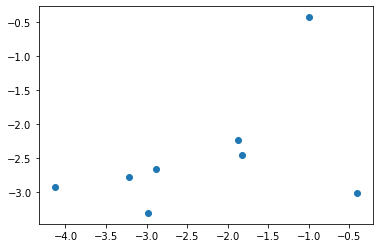

R2 = 0.11551245754515604


In [12]:
# Sub 12 TP
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

x = np.log(data_12['Flow']) # try log and non log version, and see which one works better
X = x[:, np.newaxis]
Y = np.log(data_12['TP']) # try log and non log version, and see which one works better

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

reg = linear_model.Lasso(alpha=0.001) # try different alpha values to obtain higher r2

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)
    
# compare predict vs actual values
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))


<font color='blue'> 
    R2 using OLS was 0.558, so this model did not perform better in predicting S12-TP
</font>

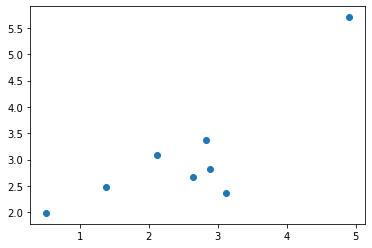

R2 = 0.5098497371312227


In [13]:
# Sub 12 TSS
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

x = np.log(data_12['Flow']) # try log and non log version, and see which one works better
X = x[:, np.newaxis]
Y = np.log(data_12['TSS']) # try log and non log version, and see which one works better

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

reg = linear_model.Lasso(alpha=0.0001) # try different alpha values to obtain higher r2

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)
    
# compare predict vs actual values
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))

<font color='blue'> 
    R2 using OLS was 0.556, so this model did not perform better in predicting S12-TSS but both model performances were close.
</font>

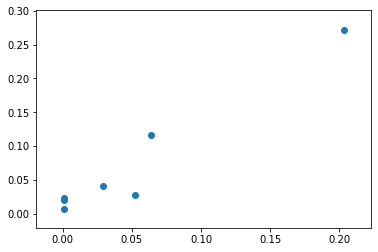

R2 = 0.7049103617005045


In [14]:
# Sub 11 DRP
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

x = (data_11['Flow']) # try log and non log version, and see which one works better
X = x[:, np.newaxis]
Y = (data_11['DRP']) # try log and non log version, and see which one works better

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

reg = linear_model.Lasso(alpha=0.0001) # try different alpha values to obtain higher r2

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)
    
# compare predict vs actual values
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))


<font color='blue'> 
    R2 using OLS was 0.719, so this model did not perform better in predicting S11-DRP but both model performances were close.
</font>

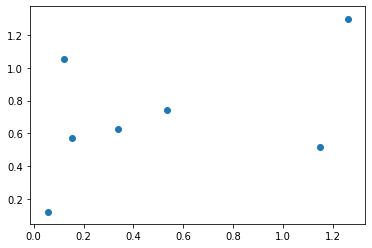

R2 = -0.06357470611670868


In [15]:
# Sub 11 TP
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

x = np.log(data_11['Flow']) # try log and non log version, and see which one works better
X = x[:, np.newaxis]
Y = (data_11['TP']) # try log and non log version, and see which one works better

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

reg = linear_model.Lasso(alpha=0.00001) # try different alpha values to obtain higher r2

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)
    
# compare predict vs actual values
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))

<font color='blue'> 
    R2 using OLS was 0.036, so this model did not perform better in predicting S11-TP. Other parameters (besides flow) is probably needed to predict TSS more precisely.
</font>

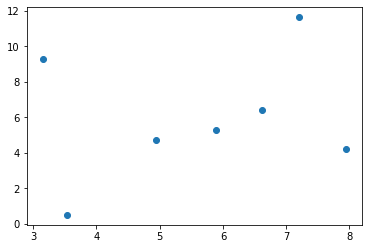

R2 = -3.056273267276598


In [16]:
# Sub 11 TSS
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

x = np.log(data_11['Flow']) # try log and non log version, and see which one works better
X = x[:, np.newaxis]
Y = np.log(data_11['TSS']) # try log and non log version, and see which one works better

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

reg = linear_model.Lasso(alpha=0.1) # try different alpha values to obtain higher r2

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)
    
# compare predict vs actual values
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))

<font color='blue'> 
    R2 using OLS was 0.003, so this model did not perform better in predicting S11-TSS. Other parameters (besides flow) is probably needed to predict TSS more precisely.
</font>

# Discussion:
<font color='blue'>
Based on tested parameter (changing lasso alpha, and log transforming dataset), some of the Lasso model can perdict better than OLS: <br>
S12 DRP: improved r2 from 0.413 (OLS model) to 0.883 (Lasso model) <br>
S12 TP: decreased r2 from 0.558 to 0.115 <br>
S12 TSS: slighlty decreased r2 from 0.556 to 0.510 <br>
S11 DRP: slighlty decreased r2 from 0.719 to 0.705 <br>
S11 TP: decreased r2 from 0.036 to -0.064 (it's not likely possible to improve model performance using only flow as predictor) <br>
S11 TSS: decreased r2 from 0.003 to -3.056 (it's not likely possible to improve model performance using only flow as predictor) <br>

In summary, multiple models can be tested while tweaking the model parameters (using loop iteration) to obtain the "best" prediction model. In future development, I can run the dataset through different potentially suitable model, and select the best model for each dataset. However, there is no guarantee that any models would work on a certain dataset (unpredictable using only flow as parameter) such as S11-TP and S11-TSS concentration. Other parameters such as antecedent soil moisture, land cover, and crop type should be considered in the model development.
</font>